In [30]:
import numpy as np
import os
import glob
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import shutil

from preprocess import read_instance, CHANNELS
sns.set()


In [2]:
with open('config.yaml', "r") as config_file:
    config = yaml.full_load(config_file)
images_paths = glob.glob(os.path.join(config['train_input_path'], '?GG', '*'))

### Explore distribution of background

In [3]:
nonzero_pixels = []
for path in tqdm.tqdm(images_paths):
    _, y = read_instance(path, load_y=True)
    nonzero_pixels.extend((y != 0).mean(axis=(0, 1)))

100%|██████████| 335/335 [02:32<00:00,  2.20it/s]


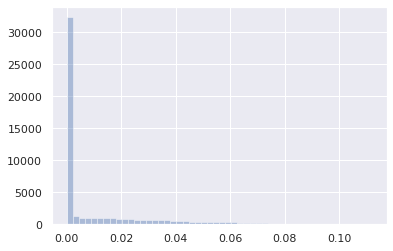

In [4]:
sns.distplot(nonzero_pixels, kde=False)

### Plot some examples

In [5]:
image, segmentation = read_instance(images_paths[0], load_y=True)

In [35]:
def plot_image_slice(image, segmentation, slice_i):
    image_slice = image[:, :, :, slice_i]
    seg_slice = segmentation[:, :, slice_i]
    
    fig, axes = plt.subplots(1, image_slice.shape[0] + 1, figsize=(20, 20))
    for i, (channel_name, channel) in enumerate(zip(CHANNELS, image_slice)):
        axes[i].imshow(channel)
        axes[i].axis('off')
        axes[i].title.set_text(channel_name)
        
    axes[-1].imshow(seg_slice)
    axes[-1].axis('off')
    plt.title("Segmentation mask")

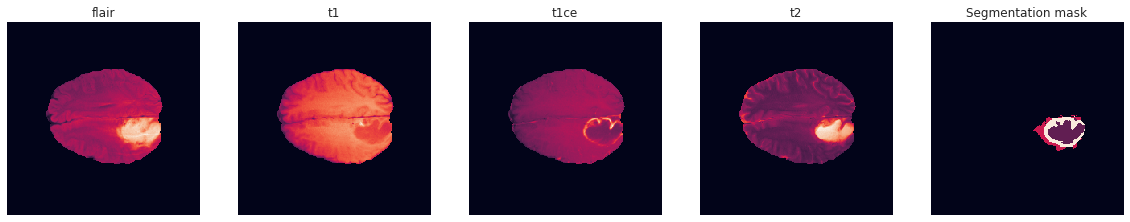

In [36]:
plot_image_slice(image, segmentation, 100)

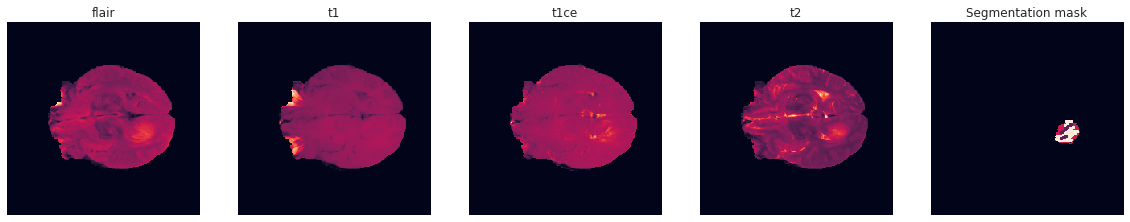

In [40]:
plot_image_slice(image, segmentation, 65)

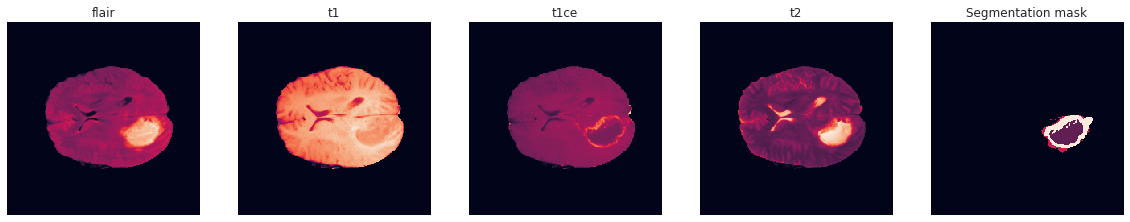

In [42]:
plot_image_slice(image, segmentation, 80)

### Plot average image

In [43]:
mean_slice = np.zeros(image.shape[:-1])
mean_mask = np.zeros(segmentation.shape[:-1])
SLICE = 100

for path in tqdm.tqdm(images_paths):
    X, y = read_instance(path, load_y=True)
    mean_slice += X[:, :, :, SLICE]
    mean_mask += y[:, :, SLICE]

mean_slice, mean_mask = mean_slice / len(images_paths), mean_mask / len(images_paths)

100%|██████████| 335/335 [02:35<00:00,  2.15it/s]


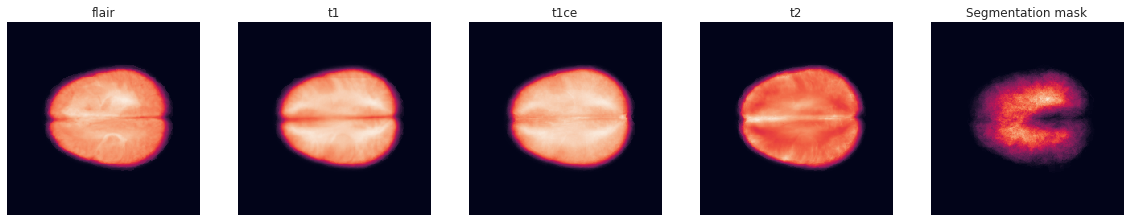

In [52]:
plot_image_slice(mean_slice.reshape(*mean_slice.shape, 1), mean_mask.reshape(*mean_mask.shape, 1), 0)